# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# зададим темный стиль оформления background для всех следующих графиков
sns.set_theme(style="darkgrid")

#расширяем максимальное кол-во столбцов для вывода на экран
pd.options.display.max_columns = 30

In [3]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')

data_2 = pd.read_csv('/datasets/geo_data_1.csv')

data_3 = pd.read_csv('/datasets/geo_data_2.csv')

Напишем простую функцию для изучения данных.

In [4]:
def data_check(data, i):
    print('--------------- Общая информация датасэта из', i, 'региона ---------------')
    print()
    display(data.info())
    
    print('- Первые 5 строк датасэта:')
    display(data.head(5))
    print()
    
    print('- Описательная статистика датасэта:')
    display(data.describe())
    
    print('- Количество уникальных скважин:')
    print()
    print(data['id'].nunique())

In [5]:
data_check(data_1, 1)

--------------- Общая информация датасэта из 1 региона ---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

- Первые 5 строк датасэта:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



- Описательная статистика датасэта:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


- Количество уникальных скважин:

99990


In [6]:
data_check(data_2, 2)

--------------- Общая информация датасэта из 2 региона ---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

- Первые 5 строк датасэта:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



- Описательная статистика датасэта:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


- Количество уникальных скважин:

99996


In [7]:
data_check(data_3, 3)

--------------- Общая информация датасэта из 3 региона ---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

- Первые 5 строк датасэта:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



- Описательная статистика датасэта:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


- Количество уникальных скважин:

99996


Удалим из датасэтов столбец id так он не несёт никакой смысловой нагрузки для нашего исследования.

In [8]:
data_1.drop('id', axis=1, inplace=True)
data_2.drop('id', axis=1, inplace=True)
data_3.drop('id', axis=1, inplace=True)

Проверим корреляцию наших признаков с помощью heatmap.

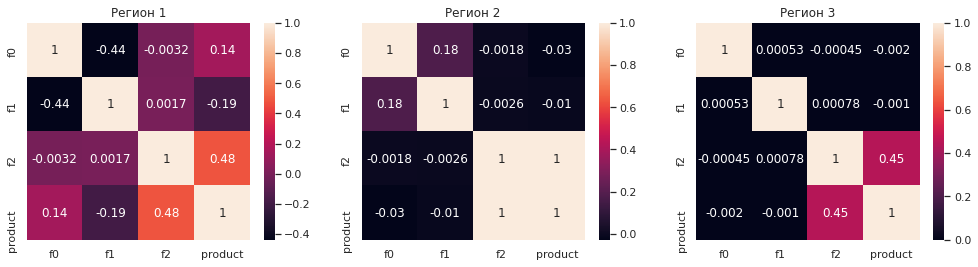

In [9]:
fig, ax1 = plt.subplots(1, 3, figsize=(17,4))

for i, j in zip([data_1, data_2, data_3], range(3)):
    sns.heatmap(
        i.corr(), 
        annot=True,
        ax=ax1[j]
    )
    ax1[j].set_title('Регион ' + str(j + 1))
    
plt.show()

В data_2 есть прямая связь между объемом запасов в скважине и признаке f2. В остальных дататсетых корреляция тоже присутствует не не такая сильная.

**Вывод**

- В полученных датасэтах отсутствуют пропуски, типы данных определены корректно;
- Присутствует корреляция между product и f2;
- В id скважин так же есть небольшое кол-во дубликатов.

## Обучение и проверка модели

In [10]:
# Так как в дальнейшем мы часто будем использовать параметр random_state 
# для фиксирования псевдослучайных величин, зададим его константой 

rnd = 12345

### Разделение данных на обучающую и валидационную выборки в соотношении 75:25

Функция для разбивки датасэтов на обучающую и валидационную выборки.

In [11]:
def split_sample(data):
    features = data.drop('product', axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features,
        target,
        test_size=0.25,
        random_state=rnd
    )
    
    return features_train, features_valid, target_train, target_valid

In [12]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_sample(data_1)

features_train_2, features_valid_2, target_train_2, target_valid_2 = split_sample(data_2)

features_train_3, features_valid_3, target_train_3, target_valid_3 = split_sample(data_3)

In [13]:
features_train_list = [features_train_1, features_train_2, features_train_3]
features_valid_list = [features_valid_1, features_valid_2, features_valid_3]

In [14]:
print('Итоговые размеры выборок:', '\n')

for index, val in enumerate(zip(features_train_list, features_valid_list)):
    print(
        'Обучающая выборка', index + 1, 'состоит из {} объектов'.format(
            val[0].shape[0]
        )
    )
    print(
        'Валидационная выборка', index + 1, 'состоит из {} объектов'.format(
            val[1].shape[0]
        )
    )
    print()

Итоговые размеры выборок: 

Обучающая выборка 1 состоит из 75000 объектов
Валидационная выборка 1 состоит из 25000 объектов

Обучающая выборка 2 состоит из 75000 объектов
Валидационная выборка 2 состоит из 25000 объектов

Обучающая выборка 3 состоит из 75000 объектов
Валидационная выборка 3 состоит из 25000 объектов



Масштабируем наши признаки на всех выборках. Но сперва обучим StandardScaler на каждой обучающей выборке.

In [15]:
var_numeric = ['f0', 'f1', 'f2']

def scaler_fit(features_train, features_valid):
    scaler = StandardScaler()

    for i in range(len(features_train)):   
        features_train[i][var_numeric] = scaler.fit_transform(
            features_train[i][var_numeric]
        )

        features_valid[i][var_numeric] = scaler.transform(
            features_valid[i][var_numeric]
        )

In [16]:
scaler_fit(features_train_list, features_valid_list)

### Обучение модели и предсказания на валидационной выборке.

Финкция для обучения модели по алгоритму линейной регрессии.

In [17]:
def linear_model(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predicted_valid = model.predict(features_valid)
    
    return predicted_valid

Сохраним предсказания на валидационной выборке в переменные predict_valid_ .

In [18]:
predict_valid_1 = linear_model(features_train_1, target_train_1, features_valid_1)
predict_valid_2 = linear_model(features_train_2, target_train_2, features_valid_2)
predict_valid_3 = linear_model(features_train_3, target_train_3, features_valid_3)

In [19]:
target_valid_list = [target_valid_1, target_valid_2, target_valid_3]
predict_valid_list = [predict_valid_1, predict_valid_2, predict_valid_3]

Рассчитаем средний объем запасов сырья предсказанный нашей моделью и среднюю квадратичную ошибку.

In [20]:
result_dict = {}

for index, val in enumerate(zip(predict_valid_list, target_valid_list)):
    result_dict[index + 1] = {}
    
    mse = mean_squared_error(
        val[0], 
        val[1]
    )
    
    result_dict[index + 1]['rmse'] = mse ** 0.5
    result_dict[index + 1]['mean'] = val[0].mean()
    
data_union_score = pd.DataFrame(result_dict).transpose()

На основе полученных данных построим визуализацию.

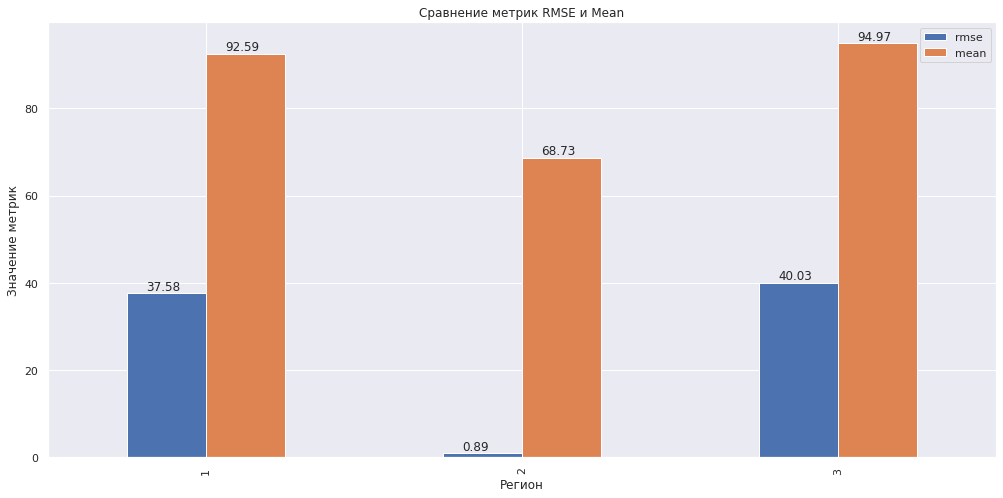

In [21]:
data_union_score_plot = round(data_union_score, 2).plot(
    kind='bar',
    figsize=(17,8)
)

data_union_score_plot.set(
    title='Сравнение метрик RMSE и Mean',
    xlabel='Регион',
    ylabel='Значение метрик'
)

for p in data_union_score_plot.patches:
    data_union_score_plot.annotate(float(p.get_height()), (p.get_x() + 0.06, p.get_height() + 0.7))

plt.show()

**Вывод**

По полученным результатам можно сказать следующее:
- самый высокий показатель получен в 3 регионе, но при этом у него самая высокая средняя квадратичная ошибка;
- во втором регионе, RMSE самая низкая, полная корреляции между f2 и product дает о себе знать.

## Подготовка к расчёту прибыли

### Ключевые значения для расчётов

In [22]:
# Бюджет на разработку скважин в регионе
BUDGET = 10000000000

# Кол-во точек для разведки
TOTAL_POINTS = 500

# Топ для исследования
TOP_POINTS = 200

# Прибыль с 1 барреля сырья
PROFIT_BARREL = 450  

# Доход с каждой единицы продукта
PROFIT_PRODUCT = 450000

# Вероятность убытков
LOOSE_FRAC = .025

### Достаточный объём сырья для безубыточной разработки новой скважины

In [23]:
# Стоимость бурения одной скважины
dev_price = BUDGET / TOP_POINTS

# Достаточный объём сырья для безубыточной разработки новой скважины
break_even_point = dev_price / PROFIT_PRODUCT

print('Стоимость одной скважины =', dev_price)
print('Достаточный объём для безубыточной разработки новой скважины =', round(break_even_point, 2))

Стоимость одной скважины = 50000000.0
Достаточный объём для безубыточной разработки новой скважины = 111.11


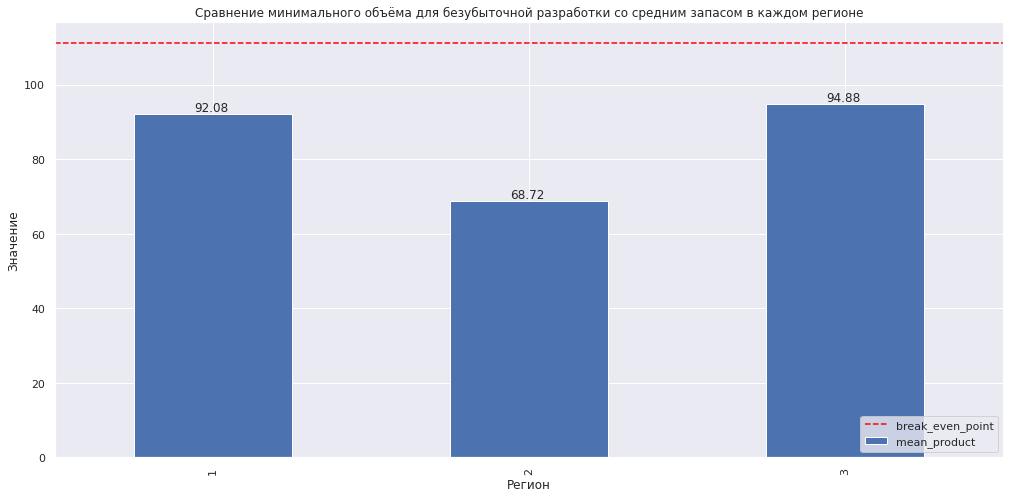

In [24]:
d = {
    'region': ['1', '2', '3'],
    'mean_product': [target_valid_1.mean(), target_valid_2.mean(), target_valid_3.mean()]
}

capacity_pivot = pd.DataFrame(data=d)

capacity_pivot_plot = round(capacity_pivot, 2).plot(
    x='region',
    y='mean_product',
    kind='bar',
    figsize=(17,8),
    label='mean_product'
)
capacity_pivot_plot.axhline(
    break_even_point,
    color='red',
    linestyle='dashed', 
    label='break_even_point'
)

plt.legend(loc ='lower right')

capacity_pivot_plot.set(
    title='Сравнение минимального объёма для безубыточной разработки со средним запасом в каждом регионе',
    xlabel='Регион',
    ylabel='Значение'
)

for p in capacity_pivot_plot.patches:
    capacity_pivot_plot.annotate(float(p.get_height()), (p.get_x() + 0.19, p.get_height() + 0.7))

plt.show()

**Вывод**

Минимальный объём для безубыточной разработки новой скважины равен 111 тыс. баррелей. Во всех регионах, по нашим подсчетам, средний запас меньше этого показателя.

## Расчёт прибыли и рисков 

Преобразуем предсказанные значения в серию панд, у фактических значений объема сырья сбросим индексы.

In [25]:
target_valid_rst_1 = target_valid_1.reset_index(drop=True)
target_valid_rst_2 = target_valid_2.reset_index(drop=True)
target_valid_rst_3 = target_valid_3.reset_index(drop=True)

predict_valid_rst_1 = pd.Series(predict_valid_1)
predict_valid_rst_2 = pd.Series(predict_valid_2)
predict_valid_rst_3 = pd.Series(predict_valid_3)

Функция для расчета прибыли в каждом регионе. Результат сохраним в словарь.

In [26]:
profit_top_dict = {}

def profit_calculate(target, predict, option, i=0): 
    predict_sort = predict.sort_values(ascending=False)
    target_top = target[predict_sort.index].head(TOP_POINTS)
    
    profit = PROFIT_PRODUCT * target_top.sum() - BUDGET

    
    if option == True:
        return profit

    else:
        profit_top_dict[i] = {}

        # Для удобного отображения итогов разделим прибыль на 10^9
        profit_top_dict[i]['profit'] = round(profit / 10**9, 2)

In [27]:
profit_calculate(target_valid_rst_1, predict_valid_rst_1, False, 1)
profit_calculate(target_valid_rst_2, predict_valid_rst_2, False, 2)
profit_calculate(target_valid_rst_3, predict_valid_rst_3, False, 3)

Визуализируем прибыль по предсказанным объемам сырья.

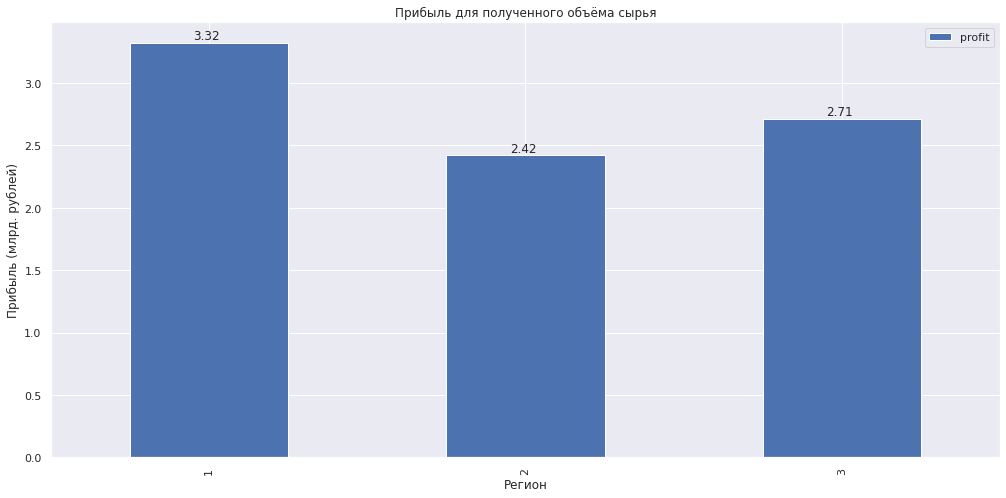

In [28]:
profit_top_union = pd.DataFrame(profit_top_dict).transpose()

profit_top_union_plot = profit_top_union.plot(
    kind='bar',
    figsize=(17,8)
)

profit_top_union_plot.set(
    title='Прибыль для полученного объёма сырья',
    xlabel='Регион',
    ylabel='Прибыль (млрд. рублей)'
)

for p in profit_top_union_plot.patches:
    profit_top_union_plot.annotate(float(p.get_height()), (p.get_x() + 0.20, p.get_height() + 0.03))

plt.show()

**Вывод**

Максимальная прибыль в 3.32 млрд. рублей в 1 регионе

## Риски и прибыль для каждого региона

In [29]:
target_valid_rst_list = [target_valid_rst_1, target_valid_rst_2, target_valid_rst_3]
predict_valid_rst_list = [predict_valid_rst_1, predict_valid_rst_2, predict_valid_rst_3]

Функция для расчета средней прибыли, доверительного интервала и риска

In [30]:
state = np.random.RandomState(rnd)

statistic_dict = {}

def risk_calculate(target, predict):    
    fig, ax1 = plt.subplots(3, 3, figsize=(17,15))
    
    for index, val in enumerate(zip(target, predict)):
        revenues = []

        for i in range(1000):
            target_subsample = val[0].sample(
                n=TOTAL_POINTS,
                replace=True,
                random_state=state
            )
            predict_subsample = val[1][target_subsample.index]

            result = profit_calculate(target_subsample, predict_subsample, True)
            revenues.append(result)

        revenues = pd.Series(revenues)

        lower = revenues.quantile(0.025)
        upper = revenues.quantile(0.975)
        mean_profit = revenues.mean()
        risk = stats.percentileofscore(revenues, 0)
        
        statistic_dict[index + 1] = {}
        statistic_dict[index + 1]['lower'] = lower
        statistic_dict[index + 1]['upper'] = upper
        statistic_dict[index + 1]['mean_profit'] = round(mean_profit / 10**6, 2)
        statistic_dict[index + 1]['risk'] = risk
        
        # Графики распределения
        sns.distplot(
            revenues,
            ax=ax1[0][index]
        )
        
        ax1[0][index].axvline(
            lower, 
            color='red'
        )
        ax1[0][index].axvline(
            mean_profit,
            color='black'
        )
        ax1[0][index].axvline(
            upper,
            color='red'
        )
        ax1[0][index].set(
            ylabel='Плотность'
        )
        
        # Графики средней прибыли
        profit_plot = sns.barplot(
            [index + 1],
            [round(mean_profit / 10**6, 2)],
            color='yellowgreen',
            ax=ax1[1][index]
        )
        ax1[1][index].set(
            ylabel='Средняя прибыль (млн. руб)',
            ylim=(0, 600)
        )
        
        for p in profit_plot.patches:
            profit_plot.annotate(float(p.get_height()), (p.get_x() + 0.35, p.get_height() + 0.03))
        
        # Графики рисков
        risk_plot = sns.barplot(
            [index + 1],
            [risk],
            color='tomato',
            ax=ax1[2][index]
        )
        ax1[2][index].set(
            xlabel='Регион',
            ylabel='Риск (%)',
            ylim=(0, 10)
        )
        
        for p in risk_plot.patches:
            risk_plot.annotate(float(p.get_height()), (p.get_x() + 0.37, p.get_height() + 0.09))
    
    statistic_dict_union = pd.DataFrame(statistic_dict).transpose()
    display(statistic_dict_union)
    plt.show()

,lower,upper,mean_profit,risk
1,-1.020901e+08,9.479764e+08,425.94,6.0
2,1.281232e+08,9.536130e+08,518.26,0.3
3,-1.158526e+08,9.896299e+08,420.19,6.2


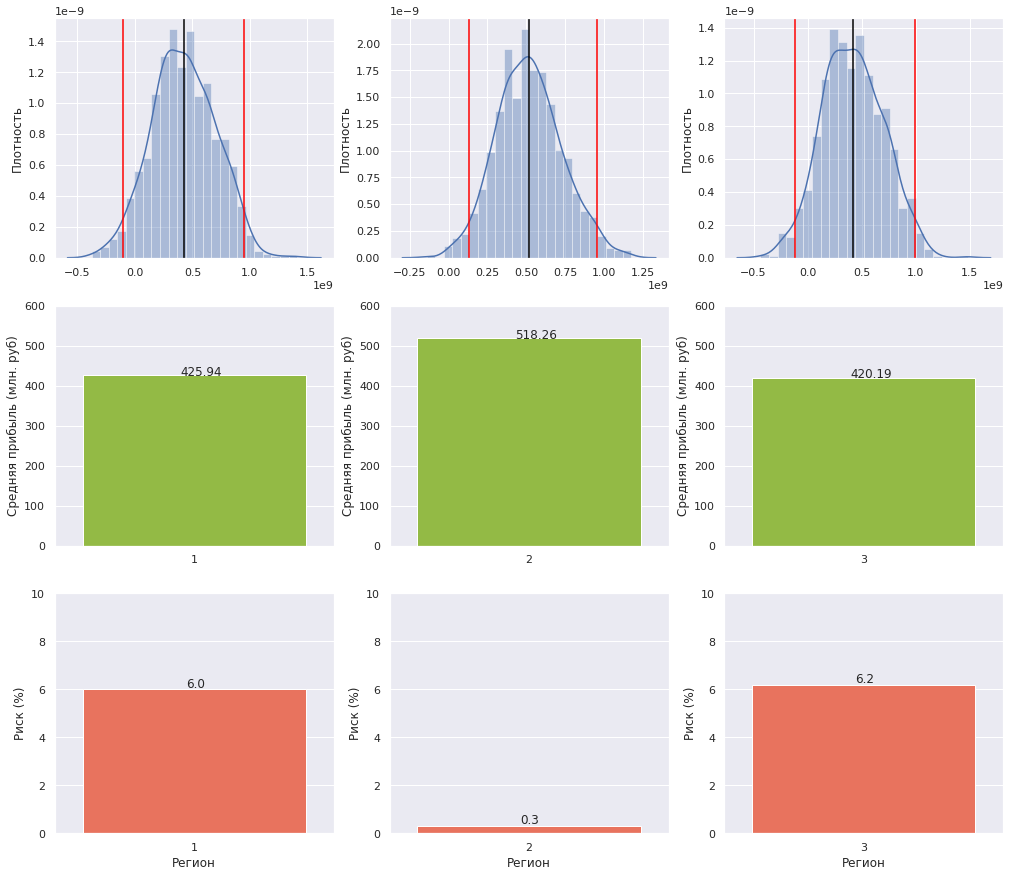

In [31]:
risk_calculate(target_valid_rst_list, predict_valid_rst_list)

## Общий вывод

Исходя из нашего исследования, регион 2 удовлетворяет всем требованиям. Вероятность убытков меньше 2.5% (0.3%) и наибольшая средняя прибыль (518 млн. руйблей), но есть нюансы. 

В данных по второму региону есть полная корреляция с одним из признаков, что ставит под сомнения качество данных и итоговые результаты! RMSE по второму региону получилась меньше 1, похоже наша модель переобучилась.